In [20]:
import numpy as np
from PIL import Image
import math

from tqdm import tqdm

%matplotlib inline
from matplotlib import pyplot as plt

([], [])

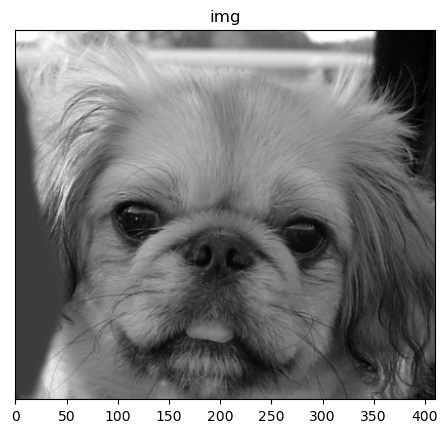

In [9]:
img = np.asarray(Image.open('../data/dog.bmp').convert('L'))

plt.subplot(1, 1, 1)
plt.imshow(img, cmap='gray')
plt.title('img')
plt.yticks([])

In [43]:
def FFT (arr: np.ndarray):
    """ Only works on 1d arrays! """
    N = len(arr)

    if N == 1:
        return arr
    else:
        arr_even = FFT(arr[::2])
        arr_odd = FFT(arr[1::2])
        factor = \
            np.exp( -2j * np.pi * np.arange(N) / N )
        
        new_arr = np.concatenate(\
            [arr_even+factor[:int(N/2)]*arr_odd,
            arr_even+factor[int(N/2):]*arr_odd])

        return new_arr

In [62]:
def fft_2d (image: np.ndarray, u: int, v: int):
    M = len(image)
    N = len(image[0])

    M_sum = 0
    for x in range(0, M):
        const = np.exp( -2j * np.pi * x * u / M )
        
        N_sum = 0
        for y in range(0, N):
            N_sum += image[x][y] * np.exp( -2j * np.pi * y * v / N )
        
        M_sum += const * N_sum

    return abs(( 1 / M ) * M_sum)

In [59]:
fft_2d(img, u=1, v=0)

(2771.316604868217-6887.581681662057j)

In [51]:
for cn in fft_arr:
    print(round(cn.real, 2) + round(cn.imag, 2) * 1j)

(4+0j)
(-4-2j)
0j
(-4+2j)


In [64]:
new_img = np.zeros(shape=np.shape(img))
for v in tqdm(range(0, len(img[0]))):
    new_img[0][v] = fft_2d(img, 0, v)

100%|██████████| 410/410 [03:39<00:00,  1.87it/s]
